<h2><center>HR Analytics ML Project</center></h2>
<h3><center>EDA - Exploratory Data Analysis</center></h3>
<h4><center>Author: Akshay Pandurang Paunikar</center></h4>
<h5>Problem Statement:</h5>
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

 - They first identify a set of employees based on recommendations/ past performance
 - Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
 - At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

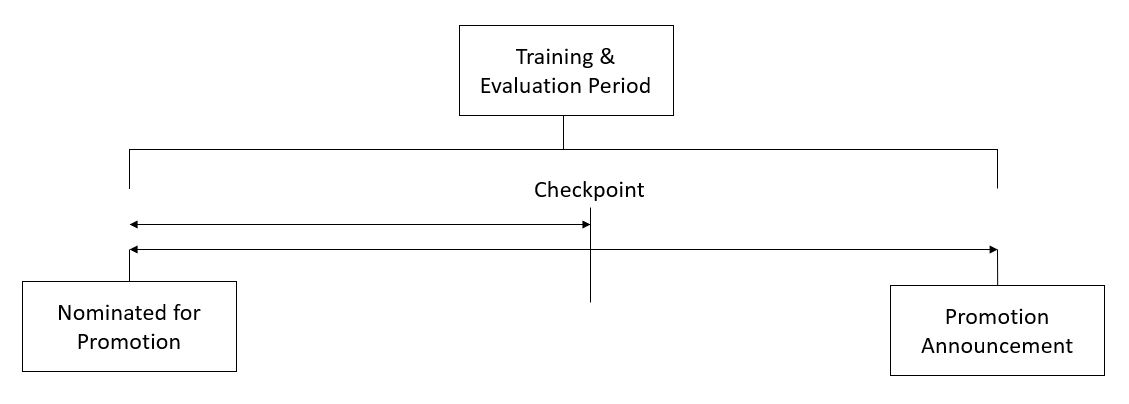

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

<h5>Dataset Description:</h5>

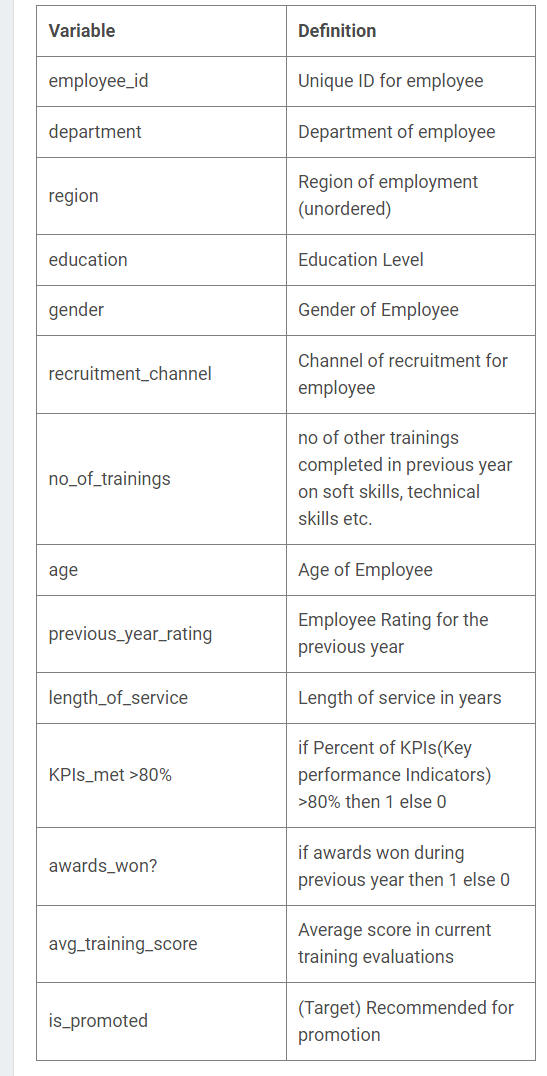

In [160]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [161]:
# set the working directory
import io
%cd "datasets/"

[WinError 2] The system cannot find the file specified: 'datasets/'
e:\iNeuron\Projects\HR_Analytics\notebook\datasets


In [162]:
# load the train and test data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# check the dimensions of data
print("train data:", train_data.shape)
print("test data:", test_data.shape)

train data: (54808, 14)
test data: (23490, 13)


In [163]:
# check first 5 records of train data
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [164]:
# check first 5 records of test data
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [165]:
# datatypes (train data)
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [166]:
# datatypes (test data)
test_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [167]:
# descriptive statistics (train data)
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


In [168]:
# descriptive statistics (test data)
test_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,23490.0,NaN,NaN,NaN,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
department,23490,9,Sales & Marketing,7315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,23490,34,region_2,5299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,22456,3,Bachelor's,15578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,23490,2,m,16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,23490,3,other,13078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,23490.0,NaN,NaN,NaN,1.254236,0.60091,1.0,1.0,1.0,1.0,9.0
age,23490.0,NaN,NaN,NaN,34.782929,7.679492,20.0,29.0,33.0,39.0,60.0
previous_year_rating,21678.0,NaN,NaN,NaN,3.339146,1.263294,1.0,3.0,3.0,4.0,5.0
length_of_service,23490.0,NaN,NaN,NaN,5.810387,4.207917,1.0,3.0,5.0,7.0,34.0


In [169]:
# concise info (train data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [170]:
# concise info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [171]:
train_data = train_data.drop(['employee_id'], axis=1)
test_data = test_data.drop(['employee_id'], axis=1)

In [172]:
# check for null/missing values (train data)
train_data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [173]:
# check for null/missing values (test data)
test_data.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [174]:
# impute missing values
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [175]:
# creating an instance for categorical and numerical imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy="median")

In [176]:
# columns with missing values
num_cols = ['previous_year_rating']
cat_cols = ['education']

In [177]:
# create pipelines for categorical and numerical data
num_pipeline = Pipeline(
    steps=[
        ("imputer", num_imputer)
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", cat_imputer)
    ]
)

In [178]:
# creating preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_cols),
    ("cat_pipeline", cat_pipeline, cat_cols)
],remainder='passthrough')

In [179]:
train_data = preprocessor.fit_transform(train_data)
test_data = preprocessor.fit_transform(test_data)

In [180]:
# check for null/missing values (train data)
train_data[0]

array([5.0, "Master's & above", 'Sales & Marketing', 'region_7', 'f',
       'sourcing', 1, 35, 8, 1, 0, 49, 0], dtype=object)

In [181]:
train_data = pd.DataFrame(train_data,columns=['previous_year_rating','education','department','region','gender','recruitment_channel',
                                              'no_of_trainings','age','length_of_service','KPIs_met >80%','awards_won?',
                                              'avg_training_score','is_promoted'])
train_data.head()

,previous_year_rating,education,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,5.0,Master's & above,Sales & Marketing,region_7,f,sourcing,1,35,8,1,0,49,0
1,5.0,Bachelor's,Operations,region_22,m,other,1,30,4,0,0,60,0
2,3.0,Bachelor's,Sales & Marketing,region_19,m,sourcing,1,34,7,0,0,50,0
3,1.0,Bachelor's,Sales & Marketing,region_23,m,other,2,39,10,0,0,50,0
4,3.0,Bachelor's,Technology,region_26,m,other,1,45,2,0,0,73,0


In [182]:
test_data = pd.DataFrame(test_data,columns=['previous_year_rating','education','department','region','gender','recruitment_channel',
                                              'no_of_trainings','age','length_of_service','KPIs_met >80%','awards_won?','avg_training_score'])
test_data.head()

,previous_year_rating,education,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,3.0,Bachelor's,Technology,region_26,m,sourcing,1,24,1,1,0,77
1,3.0,Bachelor's,HR,region_4,f,other,1,31,5,0,0,51
2,1.0,Bachelor's,Sales & Marketing,region_13,m,other,1,31,4,0,0,47
3,2.0,Bachelor's,Procurement,region_2,f,other,3,31,9,0,0,65
4,4.0,Bachelor's,Finance,region_29,m,sourcing,1,30,7,0,0,61


In [183]:
# check for null/missing values (train data)
train_data.isnull().sum()

previous_year_rating    0
education               0
department              0
region                  0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [184]:
# check for null/missing values (train data)
test_data.isnull().sum()

previous_year_rating    0
education               0
department              0
region                  0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [185]:
train_data['gender'] = train_data['gender'].map({'f':'Female','m':'Male'})
train_data['KPIs_met >80%'] = train_data['KPIs_met >80%'].map({0:'No',1:'Yes'})
train_data['awards_won?'] = train_data['awards_won?'].map({0:'No',1:'Yes'})
train_data['is_promoted'] = train_data['is_promoted'].map({0:'No',1:'Yes'})

In [186]:
test_data['gender'] = test_data['gender'].map({'f':'Female','m':'Male'})
test_data['KPIs_met >80%'] = test_data['KPIs_met >80%'].map({0:'No',1:'Yes'})
test_data['awards_won?'] = test_data['awards_won?'].map({0:'No',1:'Yes'})

In [187]:
train_data.head()

,previous_year_rating,education,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,5.0,Master's & above,Sales & Marketing,region_7,Female,sourcing,1,35,8,Yes,No,49,No
1,5.0,Bachelor's,Operations,region_22,Male,other,1,30,4,No,No,60,No
2,3.0,Bachelor's,Sales & Marketing,region_19,Male,sourcing,1,34,7,No,No,50,No
3,1.0,Bachelor's,Sales & Marketing,region_23,Male,other,2,39,10,No,No,50,No
4,3.0,Bachelor's,Technology,region_26,Male,other,1,45,2,No,No,73,No


In [188]:
test_data.head()

,previous_year_rating,education,department,region,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,3.0,Bachelor's,Technology,region_26,Male,sourcing,1,24,1,Yes,No,77
1,3.0,Bachelor's,HR,region_4,Female,other,1,31,5,No,No,51
2,1.0,Bachelor's,Sales & Marketing,region_13,Male,other,1,31,4,No,No,47
3,2.0,Bachelor's,Procurement,region_2,Female,other,3,31,9,No,No,65
4,4.0,Bachelor's,Finance,region_29,Male,sourcing,1,30,7,No,No,61


In [193]:
# save the data to csv file
train_data.to_csv("train_data.csv", index=False, header=True)
test_data.to_csv("test_data.csv", index=False, header=True)